In [9]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
# pip install gensim

In [10]:
def carregar_dados(path,nome_arq):
    lista_documentos = []
    titulos=[]
    with open( os.path.join(path, nome_arq) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            lista_documentos.append(text)
    titulos.append( text[0:min(len(text),100)] )
    return lista_documentos,titulos

In [11]:
def processar_dados(doc_set):
    # inicializar o tokenizer regex
    tokenizer = RegexpTokenizer(r'\w+')
    # cria uma lista de stopwords em inglês
    stopword_ing = set(stopwords.words('english'))
    # Crie p_stemmer da classe PorterStemmer
    p_stemmer = PorterStemmer()
    # lista de documentos tokenizados
    texts = []
    # percorrer a lista de documentos
    for i in doc_set:
        # limpar e tokenizar a string do documento
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words dos tokens
        stopped_tokens = [i for i in tokens if not i in stopword_ing]
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # adiciona tokens a lista
        texts.append(stemmed_tokens)
    return texts

In [12]:
def preparar_corpus(documento_preparado):
    # Criar o dicionário de termos do nosso courpus, onde cada termo único é atribuído a um índice.
    dictionary = corpora.Dictionary(documento_preparado)
    dictionary = corpora.Dictionary(documento_preparado)
    # Convertendo a lista de documentos (corpus) em Document Term Matrix usando o dicionário preparado acima.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in documento_preparado]
    # geramodelo LDA
    return dictionary,doc_term_matrix

In [13]:
def cria_modelo_LSA(documento_preparado,qtd_topicos,words):
    dictionary,doc_term_matrix=preparar_corpus(documento_preparado)
    # gera o modelo LSA
    lsamodel = LsiModel(doc_term_matrix, num_topics=qtd_topicos, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=qtd_topicos, num_words=words))
    return lsamodel

In [14]:
def calculo_coerencia(dictionary, doc_term_matrix, documento_preparado, stop, start=2, step=3):
    valor_coerencia = []
    model_list = []
    for qtd_topicos in range(start, stop, step):
        # gera modelo LSA
        model = LsiModel(doc_term_matrix, num_topics=qtd_topicos, id2word = dictionary)  
# modelo de treinamento
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=documento_preparado, dictionary=dictionary, coherence='c_v')
        valor_coerencia.append(coherencemodel.get_coherence())
    return model_list, valor_coerencia

In [15]:
def plot_graph(documento_preparado,start, stop, step):
    dictionary,doc_term_matrix=preparar_corpus(documento_preparado)
    model_list, valor_coerencia = calculo_coerencia(dictionary, doc_term_matrix,documento_preparado,
                                                            stop, start, step)
    # mostra o gráfico
    x = range(start, stop, step)
    plt.plot(x, valor_coerencia)
    plt.xlabel("Número de tópicos")
    plt.ylabel("Score de coerência")
    plt.legend(("valor_coerencia"), loc='best')
    plt.show()

[(0, '-0.395*"point" + -0.269*"first" + -0.250*"final" + -0.212*"quarter" + -0.203*"nba" + -0.200*"buck" + -0.188*"sun" + -0.172*"antetokounmpo" + -0.156*"player" + -0.134*"said"'), (1, '-0.363*"vaccin" + -0.328*"mask" + -0.289*"school" + -0.171*"student" + -0.169*"19" + -0.160*"guidanc" + -0.157*"covid" + -0.150*"univers" + -0.149*"effect" + -0.144*"recommend"'), (2, '0.313*"everi" + -0.299*"point" + 0.279*"day" + 0.270*"embrac" + 0.270*"champion" + 0.239*"final" + -0.224*"quarter" + 0.182*"made" + 0.177*"get" + 0.152*"play"'), (3, '-0.553*"fire" + -0.264*"deploy" + -0.202*"said" + -0.195*"oregon" + -0.184*"mobil" + -0.140*"tuesday" + -0.136*"time" + -0.135*"season" + -0.119*"mani" + -0.107*"acr"')]


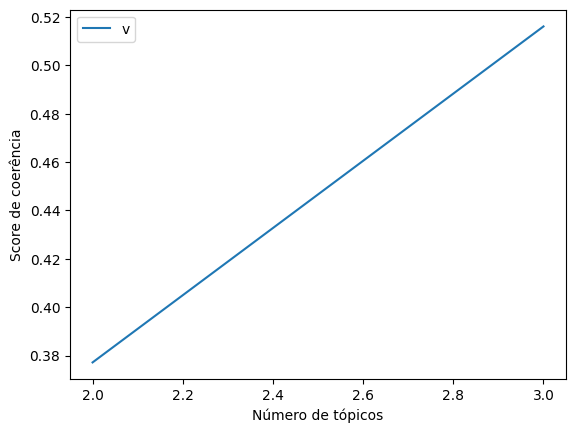

In [16]:
qtdd_topicos=4
words=10
lista_documentos,titulos=carregar_dados("","noticias.txt")
limpar_texto=processar_dados(lista_documentos)
model=cria_modelo_LSA(limpar_texto,qtdd_topicos,words)

start,stop,step=2,4,1
plot_graph(limpar_texto,start,stop,step)